### This is a clean dataset without outliers and contains tenders with value greater than 40Lac

In [44]:
vidarbha_cities = ['Nagpur', 'Chandrapur', 'Bhandara', 'Gadchiroli', 'Wardha', 'Gondia']

In [17]:
def readable_numbers(x):
    """takes a large number and formats it into K,M to make it more readable"""
    if x >= 1e7:
        s = '{:1.1f}Cr'.format(x*1e-7)
    else:
        s = '{:1.1f}Lac'.format(x*1e-5)
    return s    
    
def add_labels_on_hbars(ax, series, convert_values=True, **kwargs):
    if convert_values:
        for index, value in enumerate(series):
            ax.text(value, index, readable_numbers(value), **kwargs)
    else:
        for index, value in enumerate(series):
                    ax.text(value, index, value, **kwargs)
            
def add_labels_on_vbars(ax, series, convert_values=True, **kwargs):
    if convert_values:
        for index, value in enumerate(series):
            ax.text(index, value, readable_numbers(value), **kwargs)
    else:    
        for index, value in enumerate(series):
            ax.text(index, value, value, **kwargs)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df = pd.read_excel('C:/Users/CWC/GEOsystems/BidAssist/Tenders/EDA/Civil Tenders EDA/Tender Dataset without outliers.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5913 entries, 0 to 5912
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   authority        5913 non-null   object        
 1   stage            5913 non-null   object        
 2   contract_date    5913 non-null   datetime64[ns]
 3   contract_amount  5913 non-null   object        
 4   city             5913 non-null   object        
 5   tender_id        5913 non-null   object        
 6   state            5913 non-null   object        
 7   categories       5913 non-null   object        
 8   numeric_amount   5913 non-null   int64         
 9   year             5913 non-null   int64         
 10  quarter          5913 non-null   int64         
 11  month_name       5913 non-null   object        
 12  month_no         5913 non-null   int64         
 13  week_of_year     5913 non-null   object        
 14  week             5913 non-null   int64  

In [4]:
df.describe(include='all')

,authority,stage,contract_date,contract_amount,city,tender_id,state,categories,numeric_amount,year,quarter,month_name,month_no,week_of_year,week,day_of_month,day
count,5913,5913,5913,5913,5913,5913,5913,5913,5.913000e+03,5913.000000,5913.000000,5913,5913.000000,5913,5913.000000,5913.000000,5913
unique,76,5,NaN,620,14,5910,3,745,NaN,NaN,NaN,12,NaN,53,NaN,NaN,7
top,Rural Development Department,AOC,NaN,₹ 1 Cr,Nagpur,2022_NHAI_121714_1,Maharashtra,"Civil Works Water Works, Water Storage And Supply",NaN,NaN,NaN,Jan,NaN,2023 W01,NaN,NaN,Mon
freq,2937,4353,NaN,228,1120,3,5462,838,NaN,NaN,NaN,790,NaN,246,NaN,NaN,1140
mean,NaN,NaN,2023-01-24 17:56:39.086758144,NaN,NaN,NaN,NaN,NaN,1.020599e+07,2022.583629,2.445967,NaN,6.328260,NaN,25.604093,15.322510,NaN
min,NaN,NaN,2022-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,4.010000e+06,2022.000000,1.000000,NaN,1.000000,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,2022-11-10 00:00:00,NaN,NaN,NaN,NaN,NaN,5.350000e+06,2022.000000,1.000000,NaN,3.000000,NaN,9.000000,8.000000,NaN
50%,NaN,NaN,2023-01-19 00:00:00,NaN,NaN,NaN,NaN,NaN,7.700000e+06,2023.000000,2.000000,NaN,6.000000,NaN,25.000000,15.000000,NaN
75%,NaN,NaN,2023-04-12 00:00:00,NaN,NaN,NaN,NaN,NaN,1.200000e+07,2023.000000,4.000000,NaN,10.000000,NaN,40.000000,23.000000,NaN
max,NaN,NaN,2023-07-31 00:00:00,NaN,NaN,NaN,NaN,NaN,3.400000e+07,2023.000000,4.000000,NaN,12.000000,NaN,52.000000,31.000000,NaN


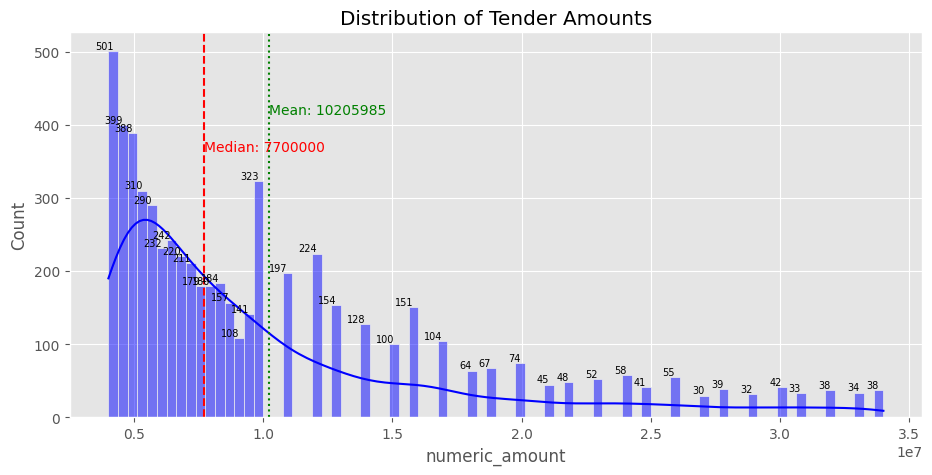

In [5]:
median_tender_amount = round(df['numeric_amount'].median())
mean_tender_amount = round(df['numeric_amount'].mean())

plt.figure(figsize=(11,5))
ax = sns.histplot(data=df, x='numeric_amount', color='blue', kde=True, bins=80)
plt.title('Distribution of Tender Amounts')
containers = ax.containers[0]
# plt.bar_label(containers, fontsize=7)

for bar in containers.patches:
    height = bar.get_height()
    if height != 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='right', va='bottom', fontsize=7)

plt.axvline(x=median_tender_amount, linestyle='--', color='red')
plt.text(median_tender_amount, 370, f'Median: {median_tender_amount}', color='red', va='center', ha='left')
plt.axvline(x=mean_tender_amount, linestyle=':', color='green')
plt.text(mean_tender_amount, 420, f'Mean: {mean_tender_amount}', color='green', va='center', ha='left')

plt.show()

In [6]:
city_list = df['city'].unique()

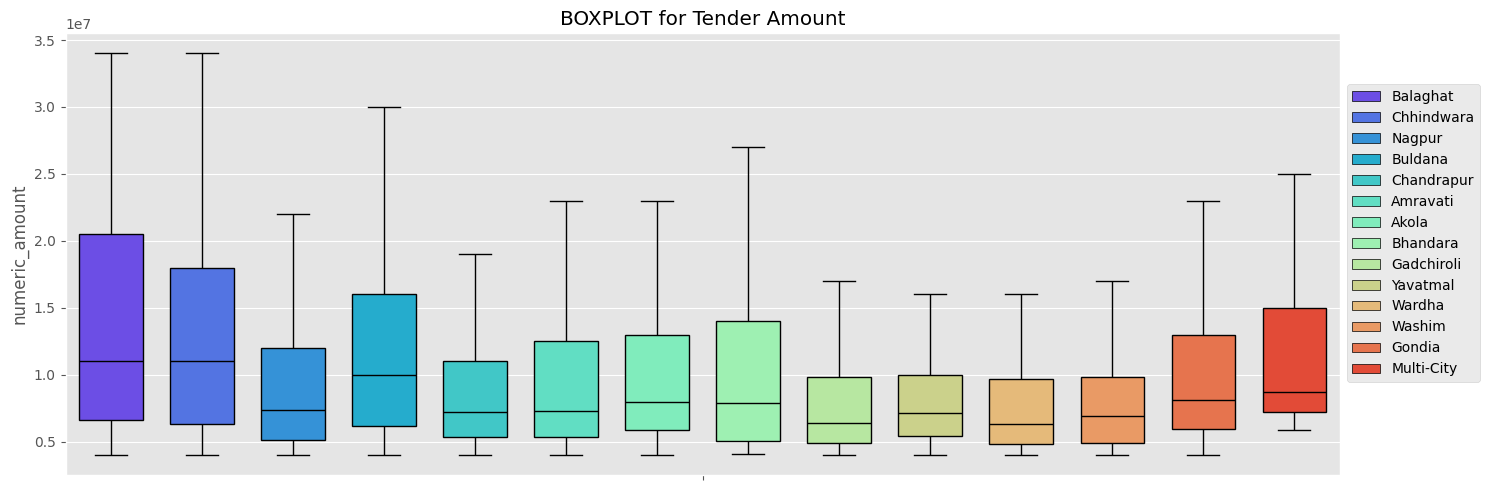

In [7]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(y=df['numeric_amount'], hue=df['city'], 
                 showfliers=False, palette='rainbow', 
                 linecolor='black', gap=0.3, hue_order=city_list,
                 width=1, legend=True)
plt.title('BOXPLOT for Tender Amount')
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.9), ncol=1)
plt.tight_layout()
plt.show()

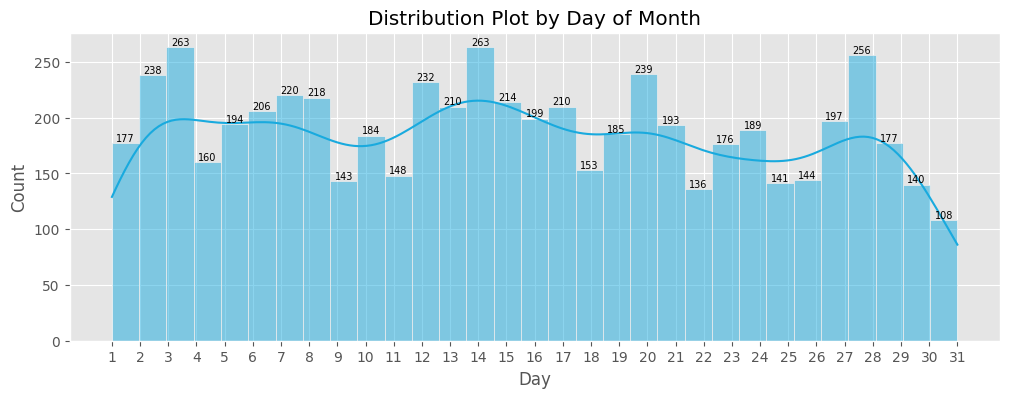

In [8]:
plt.figure(figsize=(12,4))
# Distribution Plot by Day of Month
ax= sns.histplot(data=df, x='day_of_month', bins=31, color='#19AADE', kde=True,)
plt.xticks(range(1,32), labels=range(1,32), ha='center')
plt.title("Distribution Plot by Day of Month")
plt.xlabel("Day")
containers = ax.containers[0]
plt.bar_label(containers, fontsize=7)
plt.show()

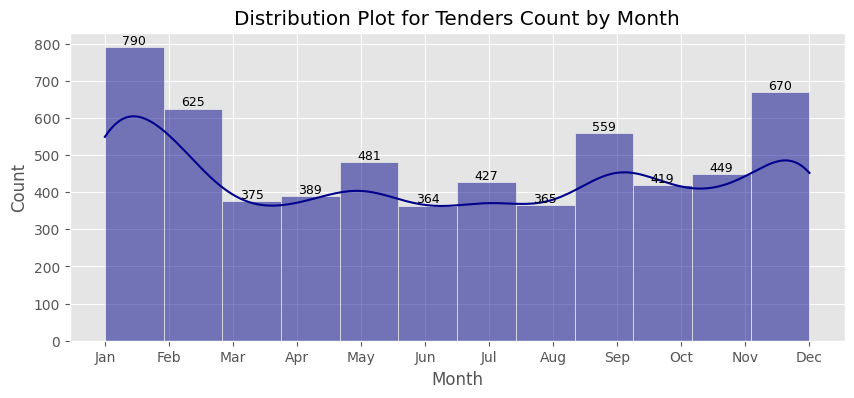

In [15]:
month_list = ['Jan', "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.figure(figsize=(10,4))
# Distribution Plot by Month
sns.histplot(data=df, x='month_no', bins=12, color='darkblue', kde=True,)
plt.xticks(range(1,13), labels=month_list, ha='center')
plt.title("Distribution Plot for Tenders Count by Month")
plt.xlabel("Month")
containers = plt.gca().containers[0]
plt.bar_label(containers, fontsize=9)
plt.show()

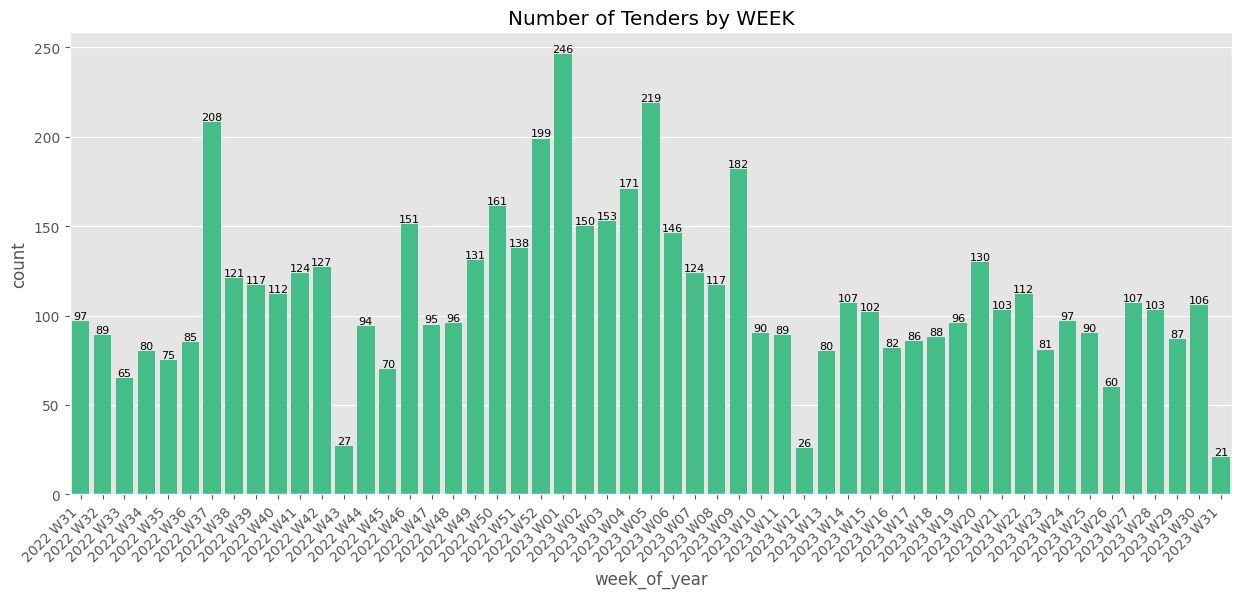

In [16]:
data = df['week_of_year'].value_counts().sort_index().reset_index()
plt.figure(figsize=(15,6))
ax = sns.barplot(data=data, x='week_of_year', y='count', color='#30d18b',)
plt.xticks(rotation=45, horizontalalignment='right')
containers = ax.containers[0]
plt.bar_label(containers, fontsize=8)
plt.title('Number of Tenders by WEEK')
plt.show()

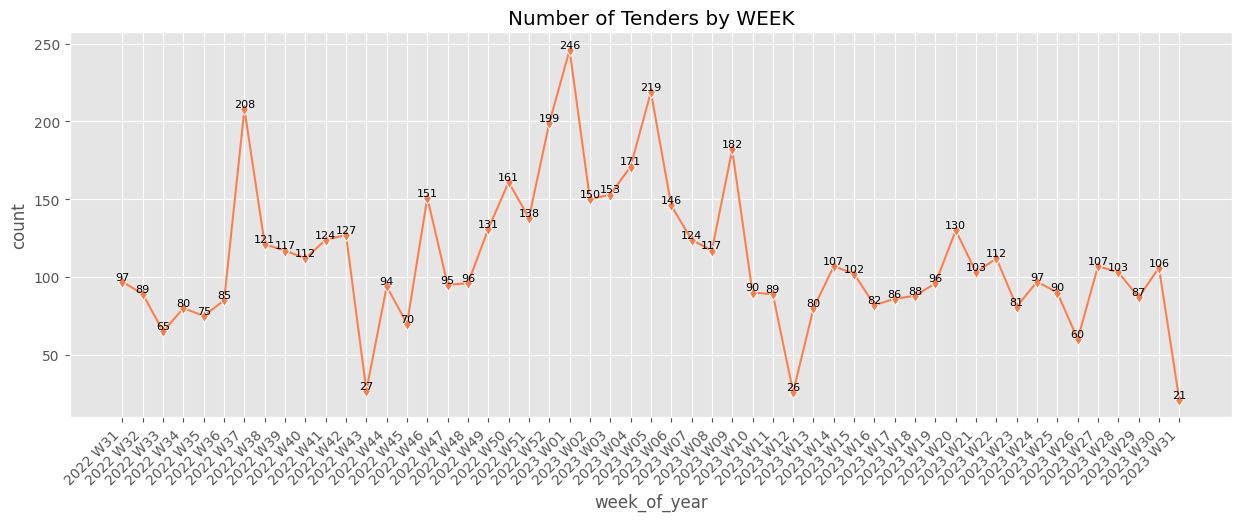

In [122]:
plt.figure(figsize=(15,5))
ax = sns.lineplot(data=data, x='week_of_year', y='count', color='coral', marker='d')
plt.xticks(rotation=45, horizontalalignment='right')
add_labels_on_vbars(ax, data['count'], va='bottom', ha='center', fontsize=8, convert_values=False)
plt.title('Number of Tenders by WEEK')
plt.show()

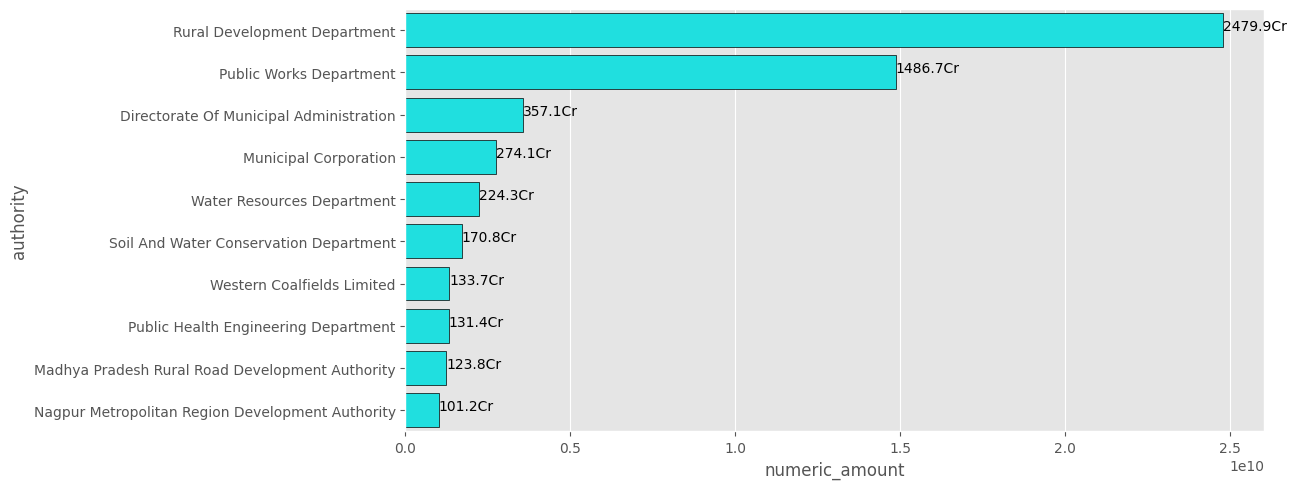

In [19]:
sum_by_authority = df.groupby("authority").agg({'numeric_amount':'sum'}) \
                                        .reset_index() \
                                        .sort_values('numeric_amount', ascending=False) \
                                        .head(10)
sum_by_authority['readable_contract_sum'] = sum_by_authority['numeric_amount'].apply(readable_numbers)

plt.figure(figsize=(13,5))
ax = sns.barplot(data=sum_by_authority, y='authority', x='numeric_amount',
                 color='cyan',
                 edgecolor='black')
add_labels_on_hbars(ax, sum_by_authority['numeric_amount'])
plt.tight_layout()
plt.show()

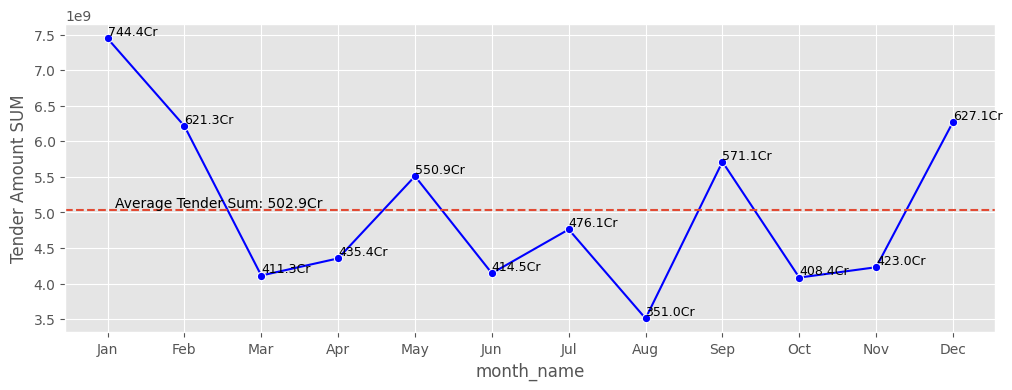

In [89]:
tender_sum_by_month = df.groupby(['month_name', 'month_no'])['numeric_amount'].sum() \
                                                .reset_index() \
                                                .sort_values(by='month_no')
tender_sum_by_month_mean = round(tender_sum_by_month['numeric_amount'].mean())
plt.figure(figsize=(12,4))
ax = sns.lineplot(data=tender_sum_by_month, x='month_name', y='numeric_amount',
                                                     marker='o', color='blue')
plt.ylabel('Tender Amount SUM')
plt.axhline(y=tender_sum_by_month_mean, linestyle='--', label='Mean')
plt.text(0.1, tender_sum_by_month_mean,
                 f'Average Tender Sum: {readable_numbers(tender_sum_by_month_mean)}',
                    color='black', va='bottom', ha='left')
add_labels_on_vbars(ax, tender_sum_by_month['numeric_amount'], fontsize=9, va='bottom')
plt.show()

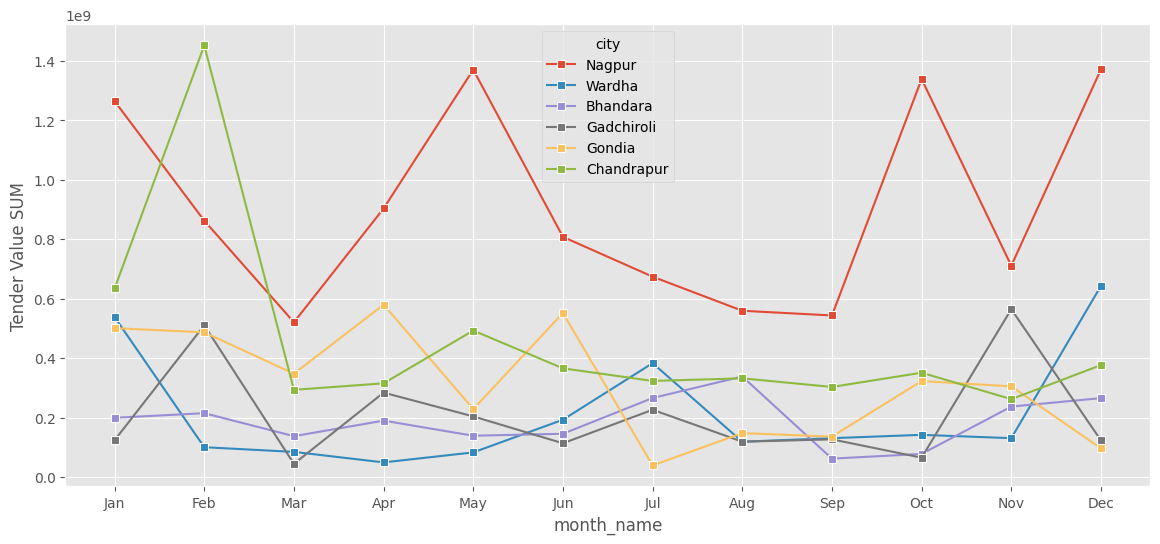

In [166]:
vidarbha_df = df[df['city'].isin(vidarbha_cities)]
vid_tender_sum_by_city_month = vidarbha_df.groupby(['city', 'month_name', 'month_no'])['numeric_amount'].sum() \
                                                .reset_index() \
                                                .sort_values(by='month_no')
plt.figure(figsize=(14,6))
ax = sns.lineplot(data=vid_tender_sum_by_city_month, x='month_name', y='numeric_amount',
                                                     marker='s', hue='city', legend=True)
plt.ylabel("Tender Value SUM")
plt.show()

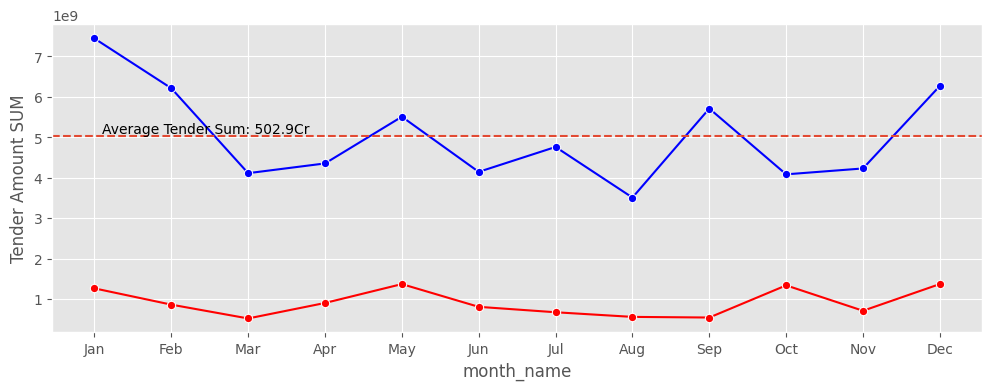

In [95]:
ngp_df = vid_tender_sum_by_city_month[vid_tender_sum_by_city_month['city']=='Nagpur']
tender_sum_by_month = df.groupby(['month_name', 'month_no'])['numeric_amount'].sum() \
                                                .reset_index() \
                                                .sort_values(by='month_no')
tender_sum_by_month_mean = round(tender_sum_by_month['numeric_amount'].mean())
plt.figure(figsize=(12,4))
ax1 = sns.lineplot(data=tender_sum_by_month, x='month_name', y='numeric_amount',
                                                     marker='o', color='blue')
ax2 = sns.lineplot(data=ngp_df, x='month_name', y='numeric_amount',
                                                     marker='o', color='red')
plt.ylabel('Tender Amount SUM')
plt.axhline(y=tender_sum_by_month_mean, linestyle='--', label='Mean')
plt.text(0.1, tender_sum_by_month_mean,
                 f'Average Tender Sum: {readable_numbers(tender_sum_by_month_mean)}',
                    color='black', va='bottom', ha='left')
add_labels_on_vbars(ax, tender_sum_by_month['numeric_amount'], fontsize=9, va='bottom')
plt.show()

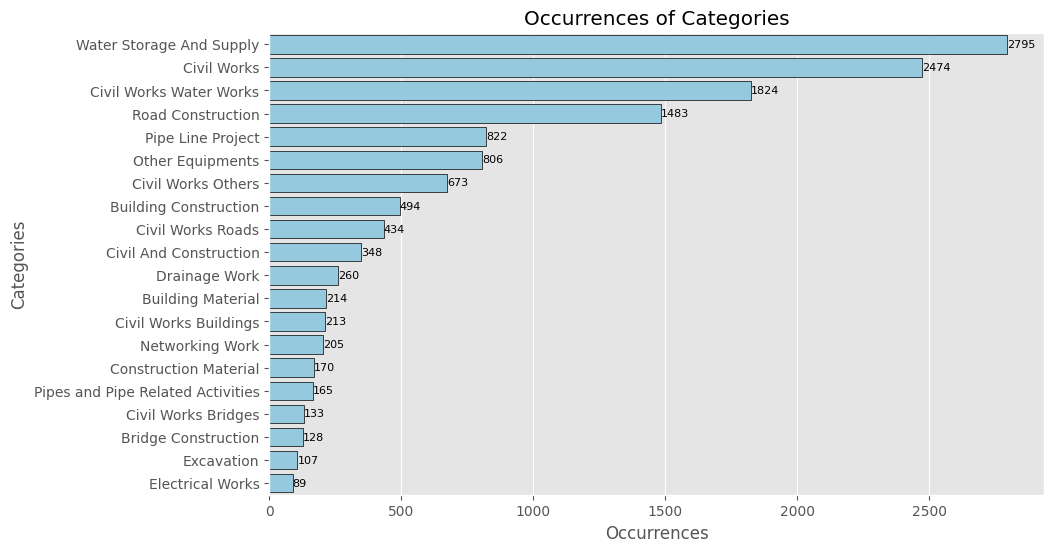

In [165]:
extracted_categories = []
for sublist in list(df['categories'].str.split(",")):
    for item in sublist:
        extracted_categories.append(item.strip())
unique_categories = set(extracted_categories)

category_count_dict = {}
for item in unique_categories:
    occurance = extracted_categories.count(item)
    category_count_dict[item] = occurance

sorted_count_categories = sorted(category_count_dict.items(), key=lambda x: x[1], reverse=True)

# Unpack the tuples into separate lists for categories and counts
categories, occurrences = zip(*sorted_count_categories[:20])
# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=categories, x=occurrences, color='skyblue', edgecolor='black')
containers = ax.containers[0]
plt.bar_label(containers, fontsize=8)
plt.xlabel('Occurrences')
plt.ylabel('Categories')
plt.title('Occurrences of Categories')
plt.show()